# 11066번 파일 합치기 - Gold 3

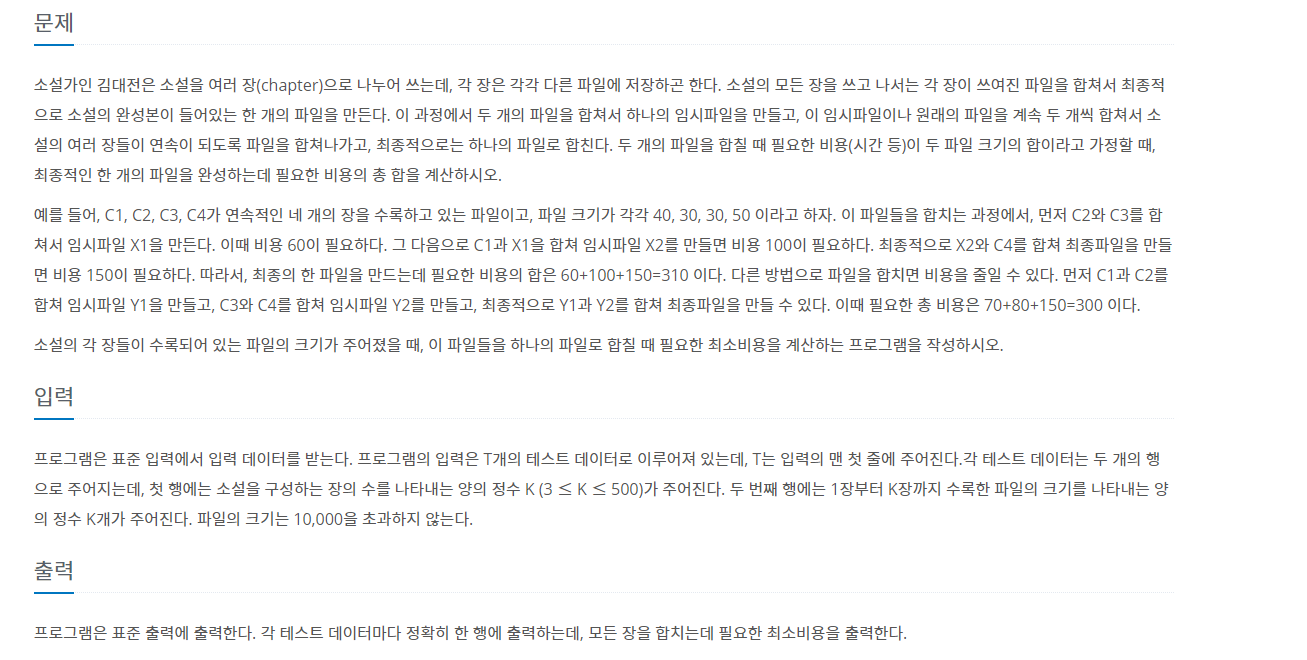
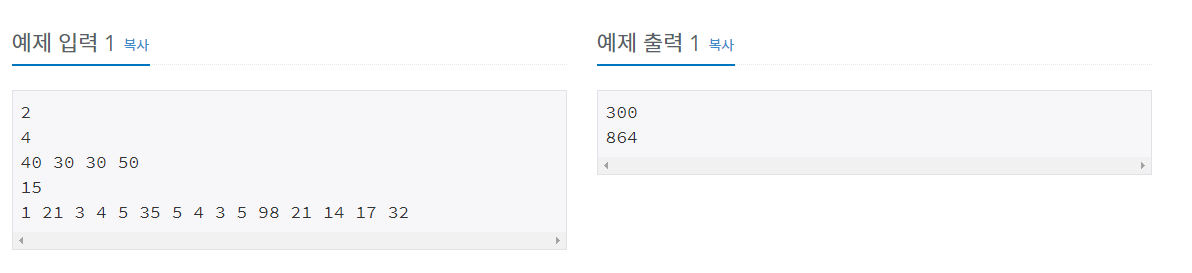

In [ ]:
import sys

n = int(input())

while n > 0:
    n -= 1
    K = int(input())
    file_list = list(map(int, sys.stdin.readline().split()))
    dp = [[0 for _ in range(K)] for _ in range(K)]
    sum = [0] * (K + 1)  # 첫번째부터 K번짹 까지의 파일크기합 한번 합칠때 추가비용
    sum[1] = file_list[0]
    for i in range(1, K + 1):  # i번째 파일까지의 합
        sum[i] = sum[i - 1] + file_list[i - 1]

    knuth = [[0 for _ in range(K)] for _ in range(K)]  # Knuth's Optimization 각 구간에서 나오는 k 저장
    for i in range(K):  # 초기화화
        knuth[i][i] = i

    for x in range(1, K):  # x만큼 더한 구간의 구하기
        for i in range(K - x):  # 시작위치 i에서 i+x까지 구간 잡아주기
            j = i + x
            dp[i][j] = 999999999999
            for k in range(knuth[i][j - 1], knuth[i + 1][j] + 1):  # 범위에 knuh 최적화를 적용
                if k < K - 1 and dp[i][j] > dp[i][k] + dp[k + 1][j] + sum[j + 1] - sum[i]:  # 최솟값찾기
                    dp[i][j] = dp[i][k] + dp[k + 1][j] + sum[j + 1] - sum[i]
                    knuth[i][j] = k

    print(dp[0][K - 1])
